## Phase 2.16

# A/B Testing

## Objectives

- Explain how A/B testing relates to hypothesis testing.
- Describe the considerations in designing an A/B test.
- Explain how to conduct an A/B test.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats

# Introduction to A/B Testing
### Optimizing your website's funnel 

> **A/B testing** is a general methodology when you want to test a new feature and/or product (especially for online products).

## What Is It Exactly?
![](https://acquire.io/wp-content/uploads/2019/11/21_11_19_What-is-Conversion-Rate-in-Business_-07.png)

In the online world, the number of visitors on your website equals the number of opportunities you have to expand your business by acquiring new customers and build relationships by catering to existing ones. It is your conversion funnel that decides whether your website gets good traffic and converts more visitors.

Businesses want visitors to take action (also called a conversion) on their website, and the rate at which a site can drive this is called its “conversion rate.” The more optimized your funnel, the higher is the conversion rate. One of the most important ways to optimize your website’s funnel in digital marketing is A/B testing.

![](https://static.wingify.com/gcp/uploads/2019/12/Why-Should-You-A-B-Test-1024x352.png?tr=w-1024)

Rolling out new features and products can be exciting but also nerve-wracking! An organization hopes that new features, updates, etc. are going to be useful to their customers/users but there's the possibility they weren't as great as they hoped.

A lot of times, we can make smaller, iterative improvements to a product before committing fully to making the change for all users or dedicating time committing to the new changes.

What we can do is give out these changes to a relatively small group in order to gain insights on how we might want to proceed in making changes.

These changes can include changes to the user-interface (UI) of a website, new recommendation models, new features, etc.
![](https://github.com/Amberlynnyandow/bsc-lecture-material/blob/main/phase_2/images/mountains.png?raw=1)

> A/B testing is best suited for informing us what improvements we can make on something we already have. It's not really meant to tell us what _new direction_ we should go.
>
> An analogy: A/B testing is meant to tell us how to climb up the mountain we're already on, but not necessarily _what_ mountain we should be on.

## How Does It Relate to What We've Learned?

At this point, you probably realized this is related to hypothesis testing! In fact, A/B testing is essentially **hypothesis testing** but applied to a business problem!

We typically will carry out _experiments_ by comparing different groups to some control group. The simplest case is comparing a group exposed to the new changes to a group where no changes were made. But you can also have _many_ different groups each with slight variations!

![](https://images.ctfassets.net/zw48pl1isxmc/4QYN7VubAAgEAGs0EuWguw/165749ef2fa01c1c004b6a167fd27835/ab-testing.png)
> *Image source from [Optimizely](https://www.optimizely.com/optimization-glossary/ab-testing/)*

When we have these groups, we can use an appropriate hypothesis test to determine if it is _significant_ enough to warrant making the change. 

![](https://github.com/Amberlynnyandow/bsc-lecture-material/blob/main/phase_2/images/huh.png?raw=1)

And this is where your skills of a data scientist can shine. It's not just doing the technical stuff correctly (though it is important!), but also how you communicate your findings to stakeholders who likely have limited knowledge of statistics.

# Designing an Experiment

## Consider Whom You're Testing
It's important to consider _whom_ you're testing! You want to ensure that the participants in your experiment will be useful when drawing conclusions as the experiment concludes.

Sometimes it's not feasible or worth the time to segment the population.

## Be Aware of Initial Launch

### Novelty Effect

> When users love the newest and latest but eventually the "newness" wears off

## Determining Size of Experiment

When talking about hypothesis tests, *typically the larger the sample the better!* Does the same apply for A/B testing?

Well in an A/B test, there's likely more to consider beyond getting a significant result. 

> *For example, if it takes a long time to collect data from an individual then it might be a better idea to limit the number of participants in an experiment.*

It also might not be worth experimenting with many individuals since it might cost the business. 

> *For example, imagine if we test on a substantial number of participants but it turns out the users react **negatively** to that change and they quit using the product completely!*

So we really want to ensure we determine the size of the experiment so we can still observe a significant difference without any negative effects!

### We Need More Power!

We really need to figure out a **sample size** but still keep the integrity of our hypothesis test to identify a signal in our experiment.

We can probably think of the opposite based on what we learned; *what things change as we increase/decrease our sample size?*

You might've thought of **confidence level** (related to $\large \alpha$) but the sample size can also affect $\large \beta$ (related to the probability of a type 2 error) and **effect size**!

> **Remember:**
>
> $\beta$ is the probability of a type II error occurring and is generally set to $20\%$, similar to how $\alpha$ is the probability of a type I error occurring and generally set to $5\%$.
>
> Typically, we talk about **statistical power** which is simply $1-\beta$.

*As we've seen before...* 

https://rpsychologist.com/d3/nhst/

For A/B tests, we can specify what confidence/significance level we want ($\alpha$), the statistical power, and what effect we want to detect to determine the sample size. Sometimes we may need to limit the number of samples because of some constraint of the test and can sacrifice one of the other values like our confidence or effect size we hope to detect.

Finding one of the parameters by setting the other three is called a **power analysis**. This can sometimes be a complicated process because we have to consider what kind of statistical test we'll use.

# Example A/B Test
## The Scenario

We've been hired on by a company looking to see if they can change out their UI to get more website visitors to create an account. 

*Their innovative idea? **Modify their sign-up button from pink to slightly more pink**!*

## What's Our Goal?

They've tasked us to figure out if it's worth them making the change. They say their developers really don't want to put in the effort unless we're confident it has an effect.

***What information do we need before designing our experiment?***

### Here's What We Asked & This Is What They Said:

* _How much of an increase in sign-ups is "worth" the change?_
> The company says if they have an absolute increase in the conversion rate of **just $2\%$**, it'd be worth making the change for the whole site!

* _What's the time frame for this experiment?_
> The company says we really can afford running the experiment for **a month** since they need to make a decision soon so they can focus on the next UI updates. (*I hear they're thinking of making the button a circle next!!*)

* _How many users visit the site per day?_
> The company says they have about **$40,000$ unique visitors per day**.

* _As a baseline, about how many visitors actually end up signing-up?_
> Turns out it was easier to look this up ourselves, and we find there's an **$8\%$ chance** a visitor viewing the page will sign-up.

## Design the Experiment 
Obviously we won't be designing the experiment before the data are collected but we should still consider what has to go into this.

***What would you consider before running the experiment?***

### What We Decided:

- If we want to see an increase of $2\%$ from $8\%$ and we choose a typical power $0.8$ and a conservative $\alpha=0.01$, we can do a _power analysis_ to find the minimum number of samples needed is about $4,700$ samples.
- Since we're running for just a month and we have about $40,000$ visitors per day, we probably can sample a decent number of visitors without changing a lot of visitor's UI.
- We'll have two groups; a control group that will have no change and an experiment group that will have the updated sign-up button.

## Experiment Time!
Let's pretend we already collected about a month's worth of data for the control and experiment groups.

We have the data aggregated in separate files for the two groups. 

The grain of the data is one row per day's record. We recorded the number of pageviews (for the visitors assigned to a group) and the number of conversions (sign-ups).

In [2]:
# Load the data
df_control = pd.read_csv('data/ab_control.csv', index_col=0)
df_experiment = pd.read_csv('data/ab_experiment.csv', index_col=0)

In [3]:
df_control

,views,conversions
0,7779,696
1,9150,790
2,10564,917
3,9923,847
4,10065,842
5,9720,834
6,9057,756
7,7485,642
8,8513,704
9,10723,876


### Visualize Our Data
Let's look at the data and see if we can notice anything visually

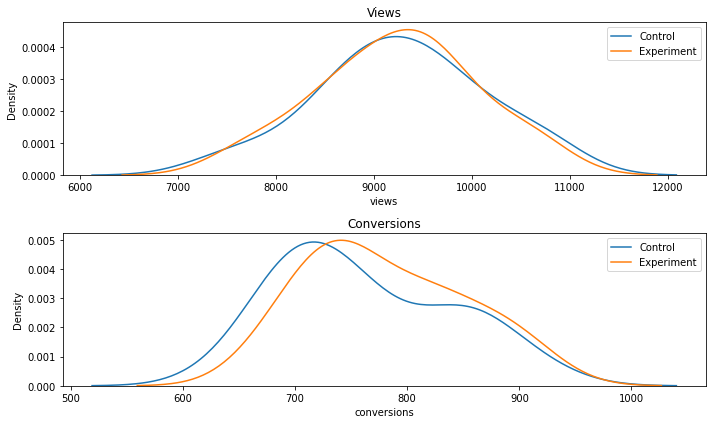

In [4]:
fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(10,6))

# Views
ax0.set(title='Views')
sns.kdeplot(data=df_control.views, ax=ax0, label='Control')
sns.kdeplot(data=df_experiment.views, ax=ax0, label='Experiment')
ax0.legend()

# Conversions
ax1.set(title='Conversions')
sns.kdeplot(data=df_control.conversions, ax=ax1, label='Control')
sns.kdeplot(data=df_experiment.conversions, ax=ax1, label='Experiment')
ax1.legend()

fig.tight_layout()

### Perform Statistical Test
Since we are looking at the **frequency of conversions from views**, we can use the Chi-Square goodness-of-fit test.

> *Pearson's chi-squared test is used to determine whether there is a statistically significant difference between the expected frequencies and the observed frequencies in one or more categories of a contingency table.*

Chi-Square goodness of fit test is used to find out how the observed value of a given phenomena is significantly different from the expected value. 

So the first step is to get our data into a format of "observed" (experiment) vs "expected" (control).

In [5]:
# We'll just sum all the days together to see an overall change
control_views = df_control['views'].sum()
control_conv = df_control['conversions'].sum()

experiment_views = df_experiment['views'].sum()
experiment_conv = df_experiment['conversions'].sum()

In [6]:
observations = np.array([
    experiment_conv, 
    experiment_views - experiment_conv
])
expectations = np.array([
    control_conv, 
    control_views - control_conv
])

print(f'OBSERVED (expermiment):\n\t{observations}')
print(f'EXPECTED (control):\n\t{expectations}')

OBSERVED (expermiment):
	[ 17950 194564]
EXPECTED (control):
	[ 17531 195796]


In [7]:
stats.chisquare(f_obs=observations, f_exp=expectations)

Power_divergenceResult(statistic=17.766385974161416, pvalue=2.4975705608443254e-05)

> *Documentation:*
>
> *The chi-square test tests the null hypothesis that the categorical data
has the given frequencies.*

In [10]:
experiment_percent = (experiment_conv/experiment_views)*100
print(f'Percent Experiment Converted: {round(experiment_percent, 3)}%')

control_percent = (control_conv/control_views)*100
print(f'Percent Control Converted: {round(control_percent, 3)}%')

diff = experiment_percent - control_percent
print(f'Difference between experiment & control {round(diff, 3)}%')

Percent Experiment Converted: 8.447%
Percent Control Converted: 8.218%
Difference between experiment & control 0.229%


## Conclusion?

We got a significant result! But although we're certain the effect isn't large enough for the company to make the change (at least based on what they told us).

We might break the news like this:

> _We're very confident that there was an observable effect in conversions by changing the buttons color. However, the observed effect was smaller than what was stated to make the change site-wide valuable._ 
>
> _The difference in button color was observed to increase sign-ups by an absolute amount of about $0.2\%$. Perhaps this change can still be made valuable since we are confident that the effect was real._